In [29]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model
tf.__version__

'2.4.4'

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [2]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [3]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

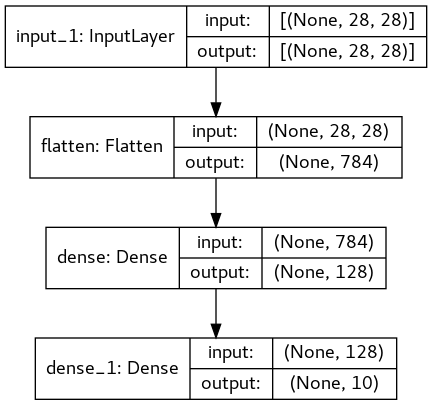

In [4]:
model = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [6]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 966us/step - loss: 0.2808 - accuracy: 0.8955
Epoch 2/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.2668 - accuracy: 0.9015
Epoch 3/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.2528 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.2450 - accuracy: 0.9084
Epoch 5/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.2339 - accuracy: 0.9133


In [10]:
model.evaluate(test_images, test_labels) #Returns the loss value & metrics values for the model in test mode.

313/313 [==============================] - 0s 583us/step - loss: 0.3286 - accuracy: 0.8870


[0.3286290168762207, 0.8870000243186951]

In [30]:
np.argmax(model.predict(test_images), axis=-1)

array([9, 2, 1, ..., 8, 1, 5])

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
training_images[0].shape

(28, 28)

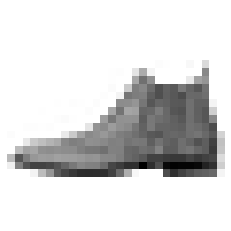

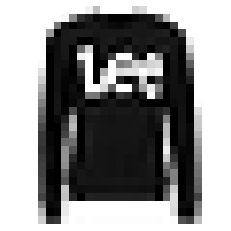

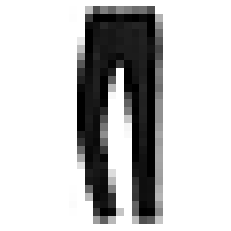

In [37]:
count = list(range(3))
for i, c in zip(test_images, count):
    some_mnist = test_images[c]
    some_mnist_image = some_mnist.reshape(28,28)
    plt.imshow(some_mnist_image, cmap='binary')
    plt.axis('off')
    plt.show()

In [21]:
test_labels[0] # https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

9